In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [ ]:
df=pd.read_csv("/content/text.csv")
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
text,0
label,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
#renaming labels
df['label']=df['label'].replace(0,'Sadness')
df['label']=df['label'].replace(1,'Joy')
df['label']=df['label'].replace(2,'Love')
df['label']=df['label'].replace(3,'Anger')
df['label']=df['label'].replace(4,'Fear')
df['label']=df['label'].replace(5,'Surprise')

EDA

In [ ]:
count=df['label'].value_counts()
count

,count
label,
Joy,141067
Sadness,121187
Anger,57317
Fear,47712
Love,34554
Surprise,14972


<ipython-input-39-946d5ef29a0d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index,y=count.values, palette='viridis')


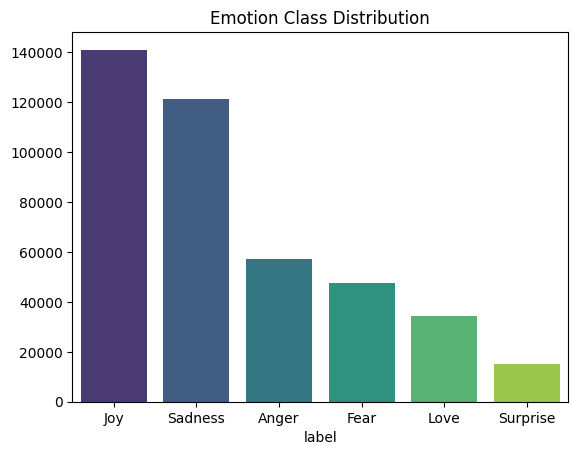

In [ ]:
sns.barplot(x=count.index,y=count.values, palette='viridis')
plt.title('Emotion Class Distribution')
plt.show()

PREPROCESSING

In [ ]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#cleaning


# Assuming df['text'] contains your text data
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
tokens = df['text'].apply(word_tokenize)  # Tokenize the text
tokens = tokens.apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word not in stop_words])
df['text'] = tokens.apply(lambda x: ' '.join(x))  # Join tokens back into a single string



SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

FEATURE ENGINEERING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Correct import statement
vectorizer = TfidfVectorizer(max_features=5000)  # Use TfidfVectorizer instead of TfidVectorizer
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train_vectorized,y_train)

LogisticRegression(max_iter=1000, random_state=42)

MODEL EVALUATION

classification report
              precision    recall  f1-score   support

       Anger       0.91      0.91      0.91     11441
        Fear       0.85      0.85      0.85      9594
         Joy       0.92      0.93      0.92     28164
        Love       0.81      0.77      0.79      6929
     Sadness       0.94      0.95      0.94     24201
    Surprise       0.78      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.87      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



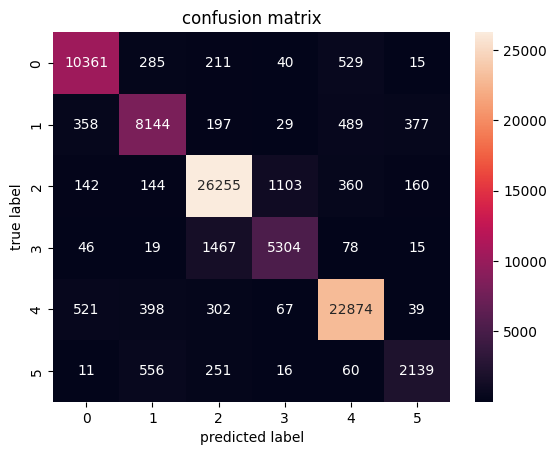

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(x_test_vectorized)
print("classification report")
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()
